In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import collections
import dataframe_image as dfi

In [3]:
data = pd.read_csv("./data/202107-citibike-tripdata.csv", low_memory=False)

## Warm Up Questions

In [4]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual
3084533,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual
3084534,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member


## Question 1:

In [5]:
#covert type from string to datetime
data["started_at"]=pd.to_datetime(data["started_at"])
data["ended_at"]=pd.to_datetime(data["ended_at"])

In [6]:
data["started_at"][0]

Timestamp('2021-07-09 16:05:36')

In [7]:
data["ended_at"][0]

Timestamp('2021-07-09 16:18:09')

In [8]:
data["duration"]=data["ended_at"]-data["started_at"]

In [9]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,0 days 00:12:33
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,0 days 00:05:32
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,0 days 00:13:33
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,0 days 00:27:50
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,0 days 00:01:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual,0 days 00:27:03
3084533,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,0 days 00:20:29
3084534,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual,0 days 00:07:07
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member,0 days 00:14:04


In [10]:
min(data["duration"])

Timedelta('-1 days +23:49:50')

In [11]:
max(data["duration"])

Timedelta('33 days 22:32:47')

In [12]:
#calculate trip duration in minutes
data["time_mins"] = data['duration'].dt.total_seconds().div(60).astype(float)

In [13]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,time_mins
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,0 days 00:12:33,12.550000
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,0 days 00:05:32,5.533333
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,0 days 00:13:33,13.550000
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,0 days 00:27:50,27.833333
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,0 days 00:01:24,1.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual,0 days 00:27:03,27.050000
3084533,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,0 days 00:20:29,20.483333
3084534,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual,0 days 00:07:07,7.116667
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member,0 days 00:14:04,14.066667


In [14]:
max(data["time_mins"])

48872.78333333333

In [15]:
min(data["time_mins"])

-10.166666666666666

In [16]:
data["time_mins"].count()

3084537

In [17]:
time_mins = data["time_mins"]

In [18]:
x = np.linspace(0,140,100)

In [19]:
len(data[(data["time_mins"]<140) & (data["time_mins"]>0)])/len(data)

0.9949042595371688

99.5% of the data falls between a trip duration of 0 to 140 minutes. 
The negative data points and any points longer than 140 minutes were removed as outliers

In [20]:
data_clean = data[data["time_mins"]>0]
data_clean = data_clean[data_clean["time_mins"]<140]

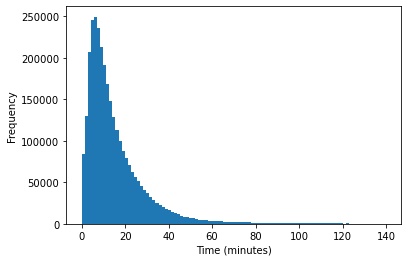

In [21]:
plt.hist(data_clean["time_mins"], x)
plt.xlabel("Time (minutes)")
plt.ylabel("Frequency")
plt.savefig("Q1_histogram", bbox_inches='tight')

## Question 2:

In [22]:
#average ride duration:
sum(data_clean["time_mins"])/len(data_clean)

15.445045243789094

In [23]:
#empiracle variance
np.var(data_clean["time_mins"])

215.31563050087365

In [24]:
#probability that a ride duration is greater than 20 mins
len(data_clean[data_clean["time_mins"]>20])/len(data_clean)

0.24612139067178612

## Question 3: 

In [25]:
len(data_clean[(data_clean["time_mins"]>20) & (data_clean["member_casual"] == "member")])/len(data_clean[data_clean["member_casual"] == "member"])

0.1926962400818294

## Question 4:

In [26]:
#P(member|d>25) = P(d>25|member)P(member)/ (P(d>25|member)P(member)*P(d>25|casual)P(casual))
prob_member = len(data_clean[data_clean["member_casual"] == "member"])/len(data_clean)
print(prob_member)
prob_casual = len(data_clean[data_clean["member_casual"] == "casual"])/len(data_clean)
print(prob_casual)
prob25_casual = len(data_clean[(data_clean["member_casual"] == "member") & (data_clean["time_mins"] > 25)])/len(data_clean[data_clean["member_casual"] == "member"])
print(prob25_casual)
prob25_member = len(data_clean[(data_clean["member_casual"] == "casual") & (data_clean["time_mins"] > 25)])/len(data_clean[data_clean["member_casual"] == "casual"])
print(prob25_member)
result = (prob25_member*prob_member)/((prob25_casual*prob_casual) + (prob25_member*prob_member))
print(result)

0.6572166686924188
0.3427833313075812
0.12523259947671625
0.2505180903853832
0.7931918417690926


## Project

In [27]:
#Only look at weekday data
data_clean["start_day"]=data_clean["started_at"].dt.weekday
data_clean["end_day"]=data_clean["ended_at"].dt.weekday

In [28]:
data_clean

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,time_mins,start_day,end_day
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,0 days 00:12:33,12.550000,4,4
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,0 days 00:05:32,5.533333,6,6
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,0 days 00:13:33,13.550000,4,4
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,0 days 00:27:50,27.833333,0,0
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,0 days 00:01:24,1.400000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual,0 days 00:27:03,27.050000,3,3
3084533,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,0 days 00:20:29,20.483333,5,5
3084534,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual,0 days 00:07:07,7.116667,6,6
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member,0 days 00:14:04,14.066667,4,4


In [29]:
#remove weekend rides
data_clean = data_clean[data_clean["start_day"] < 5]
data_clean = data_clean[data_clean["end_day"] < 5]

In [30]:
data_clean["start_station_id"].value_counts()

6140.05    9887
5980.07    9543
5329.03    9495
6173.08    9143
6912.01    9096
           ... 
6474.02      15
7983.04      13
8040.03      12
8711.02       6
7226.03       2
Name: start_station_id, Length: 1487, dtype: int64

In [31]:
data_clean["end_station_id"].value_counts()

6140.05    9919
5980.07    9822
5329.03    9476
6912.01    9194
6173.08    9051
           ... 
HB402         1
JC051         1
JC105         1
HB602         1
JC103         1
Name: end_station_id, Length: 1509, dtype: int64

In [32]:
data_clean.loc[data_clean['start_station_id'] == 6140.05]["start_station_name"][4566]

'W 21 St & 6 Ave'

In [33]:
data_clean.loc[data_clean['start_station_id'] == 5980.07]["start_station_name"][589790]

'E 17 St & Broadway'

In [34]:
data_clean.loc[data_clean['start_station_id'] == 5329.03]["start_station_name"][2805]

'West St & Chambers St'

In [35]:
data_clean

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,time_mins,start_day,end_day
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,0 days 00:12:33,12.550000,4,4
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,0 days 00:13:33,13.550000,4,4
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,0 days 00:27:50,27.833333,0,0
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,0 days 00:01:24,1.400000,0,0
6,705C67CE4C430371,classic_bike,2021-07-05 15:47:30,2021-07-05 16:12:06,Grove St & Broadway,4526.01,Knickerbocker Ave & George St,4979.07,40.690470,-73.923511,40.704425,-73.928360,casual,0 days 00:24:36,24.600000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084526,8DC665061833E1A3,classic_bike,2021-07-27 15:24:24,2021-07-27 15:51:54,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,0 days 00:27:30,27.500000,1,1
3084527,3FE6E2DD14986791,classic_bike,2021-07-28 16:33:07,2021-07-28 17:08:13,Riverside Dr & W 82 St,7388.10,Allen St & Stanton St,5484.09,40.787209,-73.981281,40.722055,-73.989111,casual,0 days 00:35:06,35.100000,2,2
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual,0 days 00:27:03,27.050000,3,3
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member,0 days 00:14:04,14.066667,4,4


In [36]:
#create dataframe where 'W 21 St & 6 Ave' is either the started at or ended at station
W21_data_start = data_clean[(data_clean["start_station_name"]=='W 21 St & 6 Ave')]
W21_data_end = data_clean[(data_clean["end_station_name"]=='W 21 St & 6 Ave')]

In [37]:
W21_start_index = pd.DatetimeIndex(W21_data_start['started_at'])
W21_end_index = pd.DatetimeIndex(W21_data_end['ended_at'])
W21_start_morn = W21_data_start.iloc[W21_start_index.indexer_between_time('6:00','11:00')]
W21_end_morn = W21_data_end.iloc[W21_end_index.indexer_between_time('6:00','11:00')]
W21_start_night = W21_data_start.iloc[W21_start_index.indexer_between_time('16:00','21:00')]
W21_end_night = W21_data_end.iloc[W21_end_index.indexer_between_time('16:00','21:00')]

In [38]:
#create list of days we are interested in
start_date = datetime.date(2021, 7, 1)
end_date = datetime.date(2021, 7, 31)
delta = datetime.timedelta(days=1)
days = []
while start_date <= end_date:
    if start_date.weekday() <5:
        days.append(start_date)
    start_date += delta

In [39]:
#create list of times we are interested in
def time_interval(start_hour, end_hour, minute, interval):
    return [
        f"{str(i).zfill(2)}:{str(j).zfill(2)}" 
        for i in range(start_hour, end_hour)
        for j in range(minute)
        if j % interval == 0
    ]
morn_times = time_interval(6,11, 60, 10)
morn_times.append('11:00')
night_times= time_interval(16,21,60,10)
night_times.append('21:00')

In [40]:
def count_per_day_per_time(df, times_list, out):
    if out == True:
        index='started_at'
    elif out ==False:
        index='ended_at'
#gets the number of bikes in or out of each station per day per time
#returns a list of length days*time_ints
    count_list = []
    for i in range(len(days)):
        byDay = df[df[index].dt.date == days[i]]
        byDay.reset_index(drop=False, inplace=True)
        byDay.set_index(byDay[index], inplace=True)
        for j in range(len(times_list)-1):
            byDayTime = byDay.between_time(times_list[j], times_list[j+1])
            count = len(byDayTime)
            count_list.append(count)
    return count_list

In [41]:
#subtract lists to get net change for each time interval
#list1 should be in (end)
#list2 should be out (start)
def get_rate_list(list1, list2):
    rate = []
    zip_lists = zip(list1, list2)
    for list1_i, list2_i in zip_lists:
        rate.append(list1_i-list2_i)
    return rate

In [42]:
def CountFrequency(rates, docks):
    freq = {}
    for item in rates:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    for i in range(-docks,docks+1):
        if i not in freq:
            freq[i] = 0
    return collections.OrderedDict(sorted(freq.items()))

In [43]:
#where 2 is the current state
def create_probab_matrix(frequencies, total_docks):
    p = np.matrix(np.zeros((total_docks+1, total_docks+1)))
    for i in range(total_docks+1):
        freq_subset = {key: value for key, value in frequencies.items() if key+i <=total_docks}
        freq_subset = {key: value for key, value in freq_subset.items() if key+i >=0}
        denom = 0
        count = 0
        for key in freq_subset:
            denom += freq_subset[key]
        for key in freq_subset:
            p[i,count] = (freq_subset[key]/denom)
            count+=1
    return p

In [44]:
#putting all the functions together:
W21_morn_out = count_per_day_per_time(W21_start_morn,morn_times,True)
W21_morn_in = count_per_day_per_time(W21_end_morn,morn_times,False)
W21_morn_rate = get_rate_list(W21_morn_in, W21_morn_out)
#W21 station has a capacity of 46 bikes
W21_freq_rates = CountFrequency(W21_morn_rate, 46)
W21_p_morn = create_probab_matrix(W21_freq_rates, 46)

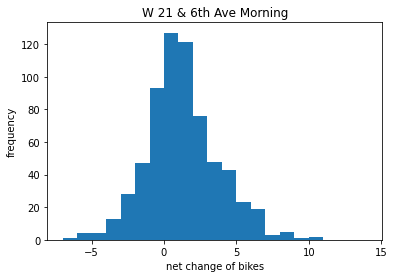

In [45]:
plt.hist(W21_morn_rate, bins=range(-7,15))
plt.xlabel("net change of bikes")
plt.ylabel("frequency")
plt.title("W 21 & 6th Ave Morning")
plt.savefig("W21_morn_hist")

In [46]:
pd.DataFrame.round(pd.DataFrame(W21_p_morn),3)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.271,0.258,0.162,0.102,0.092,0.049,0.041,0.006,0.011,0.002,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.165,0.226,0.215,0.135,0.085,0.077,0.041,0.034,0.005,0.009,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.077,0.153,0.209,0.199,0.125,0.079,0.071,0.038,0.031,0.005,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.044,0.074,0.146,0.199,0.190,0.119,0.075,0.068,0.036,0.030,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.020,0.043,0.072,0.143,0.195,0.186,0.117,0.074,0.066,0.035,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.006,0.020,0.043,0.072,0.142,0.194,0.185,0.116,0.073,0.066,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.006,0.006,0.020,0.043,0.071,0.141,0.193,0.184,0.116,0.073,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.002,0.006,0.006,0.020,0.042,0.071,0.141,0.193,0.184,0.115,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,0.002,0.002,0.006,0.006,0.020,0.042,0.071,0.141,0.192,0.183,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.002,0.002,0.006,0.006,0.020,0.042,0.071,0.141,0.192,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [74]:
#full P matrix
np.set_printoptions(edgeitems=127)
W21_p_morn

matrix([[0.27078891, 0.25799574, 0.16204691, 0.10234542, 0.09168443,
         0.04904051, 0.04051173, 0.00639659, 0.01066098, 0.0021322 ,
         0.00426439, 0.        , 0.        , 0.        , 0.        ,
         0.0021322 , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.16548043, 0.22597865, 0.21530249, 0.13523132, 0.08540925,
         0.07651246, 0.04092527, 0.03380783, 0.00533808, 0.0088968 ,
         0.00177936, 0.00355872, 0.        , 0.        , 0.        ,
         0.        , 0.00177936, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,


In [48]:
#putting all the functions together:
W21_night_out = count_per_day_per_time(W21_start_night,night_times,True)
W21_night_in = count_per_day_per_time(W21_end_night,night_times,False)
W21_night_rate = get_rate_list(W21_night_in, W21_night_out)
#W21 station has a capacity of 46 bikes
W21_freq_rates = CountFrequency(W21_night_rate, 46)
W21_p_night = create_probab_matrix(W21_freq_rates, 46)

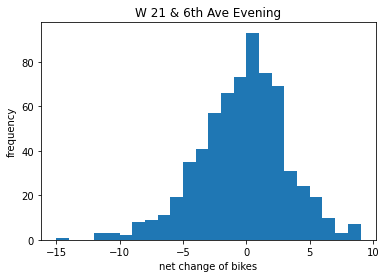

In [49]:
plt.hist(W21_night_rate, bins=range(-15,10))
plt.xlabel("net change of bikes")
plt.ylabel("frequency")
plt.title("W 21 & 6th Ave Evening")
plt.savefig("W21_Evening_hist")

In [50]:
pd.DataFrame.round(pd.DataFrame(W21_p_night),3)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.280,0.226,0.208,0.093,0.072,0.057,0.030,0.009,0.015,0.006,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.180,0.230,0.185,0.170,0.077,0.059,0.047,0.025,0.007,0.012,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.140,0.155,0.197,0.159,0.146,0.066,0.051,0.040,0.021,0.006,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.108,0.125,0.138,0.176,0.142,0.131,0.059,0.045,0.036,0.019,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.072,0.100,0.116,0.128,0.163,0.132,0.121,0.054,0.042,0.033,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.058,0.068,0.094,0.109,0.121,0.154,0.124,0.114,0.051,0.040,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.030,0.056,0.066,0.091,0.106,0.117,0.149,0.120,0.111,0.050,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.017,0.030,0.055,0.065,0.090,0.104,0.115,0.147,0.118,0.109,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,0.014,0.017,0.030,0.054,0.064,0.089,0.103,0.114,0.145,0.117,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.012,0.014,0.017,0.029,0.054,0.063,0.088,0.101,0.112,0.143,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [75]:
#full p matrix
W21_p_night

matrix([[0.28012048, 0.22590361, 0.20783133, 0.09337349, 0.07228916,
         0.05722892, 0.03012048, 0.00903614, 0.01506024, 0.0060241 ,
         0.00301205, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.18024691, 0.22962963, 0.18518519, 0.17037037, 0.07654321,
         0.05925926, 0.04691358, 0.02469136, 0.00740741, 0.01234568,
         0.00493827, 0.00246914, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,


In [51]:
#create dataframe where 'E 17 St & Broadway' is either the started at or ended at station
E17_data_start = data_clean[(data_clean["start_station_name"]=='E 17 St & Broadway')]
E17_data_end = data_clean[(data_clean["end_station_name"]=='E 17 St & Broadway')]

In [52]:
#Create morning and evening dataframes
E17_start_index = pd.DatetimeIndex(E17_data_start['started_at'])
E17_end_index = pd.DatetimeIndex(E17_data_end['ended_at'])
E17_start_morn = E17_data_start.iloc[E17_start_index.indexer_between_time('6:00','11:00')]
E17_end_morn = E17_data_end.iloc[E17_end_index.indexer_between_time('6:00','11:00')]
E17_start_night = E17_data_start.iloc[E17_start_index.indexer_between_time('16:00','21:00')]
E17_end_night = E17_data_end.iloc[E17_end_index.indexer_between_time('16:00','21:00')]

In [53]:
#putting all the functions together for 'E 17 St & Broadway' morning:
E17_morn_out = count_per_day_per_time(E17_data_start,morn_times,True)
E17_morn_in = count_per_day_per_time(E17_end_morn,morn_times,False)
E17_morn_rate = get_rate_list(E17_morn_in, E17_morn_out)
#W21 station has a capacity of 56 bikes
E17_freq_rates_morn = CountFrequency(E17_morn_rate, 56)
E17_p_morn = create_probab_matrix(E17_freq_rates_morn, 56)

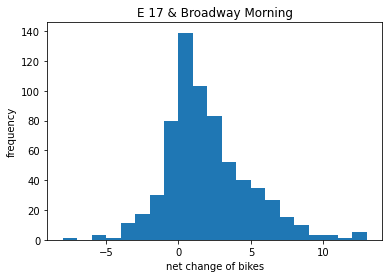

In [55]:
plt.hist(E17_morn_rate, bins=range(-8,14))
plt.xlabel("net change of bikes")
plt.ylabel("frequency")
plt.title("E 17 & Broadway Morning")
plt.savefig("E17_Morning_Hist")

In [56]:
pd.DataFrame(E17_p_morn)
pd.DataFrame.round(pd.DataFrame(E17_p_morn),3)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.269,0.199,0.161,0.101,0.077,0.068,0.052,0.029,0.019,0.006,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.134,0.233,0.173,0.139,0.087,0.067,0.059,0.045,0.025,0.017,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.048,0.128,0.222,0.164,0.132,0.083,0.064,0.056,0.043,0.024,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.026,0.047,0.124,0.216,0.160,0.129,0.081,0.062,0.054,0.042,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.017,0.026,0.046,0.122,0.212,0.157,0.127,0.079,0.061,0.053,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.002,0.017,0.026,0.046,0.122,0.212,0.157,0.127,0.079,0.061,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.005,0.002,0.017,0.026,0.046,0.121,0.211,0.156,0.126,0.079,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.000,0.005,0.002,0.017,0.026,0.046,0.121,0.211,0.156,0.126,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,0.002,0.000,0.005,0.002,0.017,0.026,0.045,0.121,0.211,0.156,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.002,0.000,0.005,0.002,0.017,0.026,0.045,0.121,0.211,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [78]:
#full p matrix
E17_p_morn

matrix([[0.2688588 , 0.19922631, 0.16054159, 0.10058027, 0.07736944,
         0.06769826, 0.05222437, 0.02901354, 0.01934236, 0.00580271,
         0.00580271, 0.00193424, 0.00386847, 0.00580271, 0.00193424,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.13400335, 0.23283082, 0.17252931, 0.13902848, 0.08710218,
         0.06700168, 0.05862647, 0.04522613, 0.02512563, 0.01675042,
         0.00502513, 0.00502513, 0.00167504, 0.00335008, 0.00502513,


In [57]:
#putting all the functions together'E 17 St & Broadway' evening:
E17_night_out = count_per_day_per_time(E17_start_night,night_times,True)
E17_night_in = count_per_day_per_time(E17_end_night,night_times,False)
E17_night_rate = get_rate_list(E17_night_in, E17_night_out)
#E17 station has a capacity of 56 bikes
E17_freq_rates_night = CountFrequency(E17_night_rate, 56)
E17_p_night = create_probab_matrix(E17_freq_rates_night, 56)

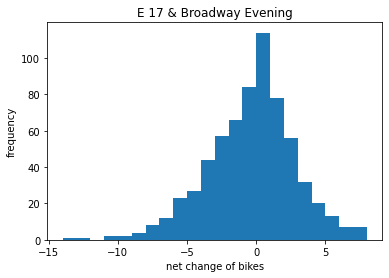

In [59]:
plt.hist(E17_night_rate, bins=range(-14,9))
plt.xlabel("net change of bikes")
plt.ylabel("frequency")
plt.title("E 17 & Broadway Evening")
plt.savefig("E17_Evening_Hist")

In [79]:
pd.DataFrame.round(pd.DataFrame(E17_p_night),3)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.347,0.237,0.170,0.097,0.061,0.040,0.021,0.015,0.006,0.006,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.203,0.276,0.189,0.136,0.077,0.048,0.031,0.017,0.012,0.005,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.138,0.175,0.238,0.163,0.117,0.067,0.042,0.027,0.015,0.010,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.106,0.123,0.157,0.213,0.146,0.104,0.060,0.037,0.024,0.013,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.076,0.098,0.114,0.145,0.197,0.134,0.097,0.055,0.034,0.022,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.044,0.072,0.094,0.109,0.138,0.188,0.129,0.092,0.053,0.033,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.037,0.043,0.070,0.090,0.105,0.133,0.181,0.124,0.089,0.051,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.019,0.036,0.042,0.069,0.089,0.103,0.131,0.178,0.121,0.087,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,0.012,0.018,0.035,0.042,0.068,0.088,0.102,0.129,0.175,0.120,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.006,0.012,0.018,0.035,0.041,0.067,0.087,0.101,0.128,0.174,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [80]:
#full p matrix
E17_p_night

matrix([[0.34650456, 0.23708207, 0.17021277, 0.09726444, 0.06079027,
         0.03951368, 0.0212766 , 0.01519757, 0.00607903, 0.00607903,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.20338983, 0.27602906, 0.18886199, 0.13559322, 0.07748184,
         0.04842615, 0.031477  , 0.01694915, 0.01210654, 0.00484262,
         0.00484262, 0.        , 0.        , 0.        , 0.        ,


In [61]:
#create dataframe where 'West St & Chambers St is either the started at or ended at station
WCham_data_start = data_clean[(data_clean["start_station_name"]=='West St & Chambers St')]
WCham_data_end = data_clean[(data_clean["end_station_name"]=='West St & Chambers St')]

In [62]:
#Create morning and evening dataframes
WCham_start_index = pd.DatetimeIndex(WCham_data_start['started_at'])
WCham_end_index = pd.DatetimeIndex(WCham_data_end['ended_at'])
WCham_start_morn = WCham_data_start.iloc[WCham_start_index.indexer_between_time('6:00','11:00')]
WCham_end_morn = WCham_data_end.iloc[WCham_end_index.indexer_between_time('6:00','11:00')]
WCham_start_night = WCham_data_start.iloc[WCham_start_index.indexer_between_time('16:00','21:00')]
WCham_end_night = WCham_data_end.iloc[WCham_end_index.indexer_between_time('16:00','21:00')]

In [63]:
#putting all the functions together for 'West St & Chambers St' morning:
WCham_morn_out = count_per_day_per_time(WCham_data_start,morn_times,True)
WCham_morn_in = count_per_day_per_time(WCham_end_morn,morn_times,False)
WCham_morn_rate = get_rate_list(WCham_morn_in, WCham_morn_out)
#WCham station has a capacity of 29 bikes
WCham_freq_rates_morn = CountFrequency(WCham_morn_rate, 29)
WCham_p_morn = create_probab_matrix(WCham_freq_rates_morn, 29)

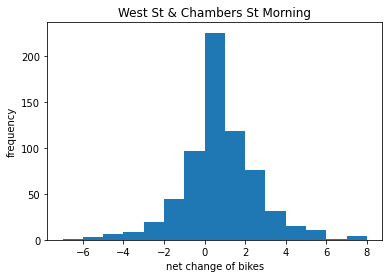

In [65]:
plt.hist(WCham_morn_rate, bins=range(-7,9))
plt.xlabel("net change of bikes")
plt.ylabel("frequency")
plt.title("West St & Chambers St Morning")
plt.savefig("WCham_Morning_Hist")

In [81]:
pd.DataFrame.round(pd.DataFrame(WCham_p_morn),3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.467,0.245,0.158,0.064,0.031,0.023,0.002,0.006,0.002,0.002,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.166,0.389,0.204,0.131,0.054,0.026,0.019,0.002,0.005,0.002,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.071,0.154,0.362,0.190,0.122,0.050,0.024,0.018,0.002,0.005,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.030,0.069,0.150,0.351,0.184,0.119,0.048,0.023,0.017,0.002,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.014,0.029,0.068,0.148,0.346,0.182,0.117,0.048,0.023,0.017,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.009,0.014,0.029,0.067,0.146,0.343,0.180,0.116,0.047,0.023,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.005,0.009,0.014,0.029,0.067,0.146,0.341,0.179,0.115,0.047,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.002,0.005,0.009,0.014,0.029,0.067,0.145,0.341,0.179,0.115,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,0.000,0.002,0.005,0.009,0.014,0.029,0.067,0.145,0.341,0.179,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.002,0.005,0.009,0.014,0.029,0.067,0.145,0.341,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [82]:
#full p matrix
WCham_p_morn

matrix([[0.46680498, 0.24481328, 0.15767635, 0.06431535, 0.03112033,
         0.02282158, 0.00207469, 0.00622407, 0.00207469, 0.00207469,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.16608997, 0.38927336, 0.20415225, 0.13148789, 0.05363322,
         0.02595156, 0.01903114, 0.0017301 , 0.00519031, 0.0017301 ,
         0.0017301 , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.07073955, 0.15434084, 0.36173633, 0.18971061, 0.1221865 ,
         0.04983923, 0.02411576, 0.01768489, 0.00160772, 0.00482315,
         0.00160772, 0.00160772,

In [67]:
#putting all the functions together'West St & Chambers St' evening:
WCham_night_out = count_per_day_per_time(WCham_start_night,night_times,True)
WCham_night_in = count_per_day_per_time(WCham_end_night,night_times,False)
WCham_night_rate = get_rate_list(WCham_night_in, WCham_night_out)
#WCham station has a capacity of 29 bikes
WCham_freq_rates_night = CountFrequency(WCham_night_rate, 29)
WCham_p_night = create_probab_matrix(WCham_freq_rates_night, 29)

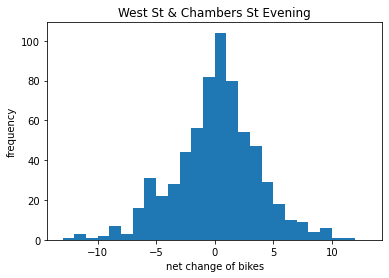

In [68]:
plt.hist(WCham_night_rate, bins=range(-13,14))
plt.xlabel("net change of bikes")
plt.ylabel("frequency")
plt.title("West St & Chambers St Evening")
plt.savefig("WCham_Evening_Hist")

In [83]:
pd.DataFrame.round(pd.DataFrame(WCham_p_night),3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.286,0.220,0.148,0.129,0.080,0.049,0.027,0.025,0.011,0.016,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.184,0.233,0.179,0.121,0.105,0.065,0.040,0.022,0.020,0.009,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.112,0.163,0.207,0.159,0.108,0.094,0.058,0.036,0.020,0.018,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.081,0.103,0.150,0.190,0.147,0.099,0.086,0.053,0.033,0.018,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.049,0.077,0.098,0.143,0.181,0.139,0.094,0.082,0.051,0.031,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.037,0.047,0.074,0.094,0.138,0.174,0.134,0.091,0.079,0.049,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.049,0.035,0.045,0.070,0.089,0.131,0.166,0.128,0.086,0.075,...,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.025,0.048,0.034,0.044,0.068,0.087,0.128,0.162,0.124,0.084,...,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,0.005,0.025,0.048,0.034,0.043,0.068,0.087,0.127,0.161,0.124,...,0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.011,0.005,0.025,0.047,0.034,0.043,0.067,0.086,0.126,0.159,...,0.002,0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000


In [84]:
#full p matrix
WCham_p_night

matrix([[0.28571429, 0.21978022, 0.14835165, 0.12912088, 0.07967033,
         0.04945055, 0.02747253, 0.02472527, 0.01098901, 0.01648352,
         0.00274725, 0.00274725, 0.        , 0.        , 0.00274725,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.1838565 , 0.23318386, 0.1793722 , 0.12107623, 0.10538117,
         0.06502242, 0.04035874, 0.02242152, 0.02017937, 0.00896861,
         0.01345291, 0.00224215, 0.00224215, 0.        , 0.        ,
         0.00224215, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.11155378, 0.16334661, 0.20717131, 0.15936255, 0.10756972,
         0.0936255 , 0.05776892, 0.03585657, 0.01992032, 0.01792829,
         0.00796813, 0.01195219,

## Stationary distribution for each station

In [70]:
def stationary_dist(P):
    rowlen = P.shape[1]
    q = [(np.ones(rowlen))]
    b = [np.zeros(rowlen+1)]
    b[0][-1] = 1

    A = np.append(np.transpose(P) - np.identity(rowlen), q, axis=0)
    b = np.transpose(np.array(b))
    result = np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))
    print(list(result))
    return result

In [71]:
stationary = stationary_dist(W21_p_morn)
print(stationary)

[matrix([[1.38688384e-06]]), matrix([[2.15025054e-06]]), matrix([[3.00391897e-06]]), matrix([[4.02813262e-06]]), matrix([[5.34611849e-06]]), matrix([[7.00155157e-06]]), matrix([[9.13754535e-06]]), matrix([[1.18590435e-05]]), matrix([[1.53965843e-05]]), matrix([[1.99765527e-05]]), matrix([[2.59243934e-05]]), matrix([[3.3636332e-05]]), matrix([[4.3643169e-05]]), matrix([[5.66283134e-05]]), matrix([[7.34783921e-05]]), matrix([[9.53461183e-05]]), matrix([[0.00012372]]), matrix([[0.00016053]]), matrix([[0.0002083]]), matrix([[0.00027029]]), matrix([[0.00035072]]), matrix([[0.00045508]]), matrix([[0.0005905]]), matrix([[0.00076621]]), matrix([[0.00099423]]), matrix([[0.00129007]]), matrix([[0.00167398]]), matrix([[0.00217204]]), matrix([[0.00281833]]), matrix([[0.003657]]), matrix([[0.00474494]]), matrix([[0.00615625]]), matrix([[0.0079855]]), matrix([[0.01035546]]), matrix([[0.01342713]]), matrix([[0.01740579]]), matrix([[0.02255165]]), matrix([[0.02920542]]), matrix([[0.03778779]]), matrix

Alternate iterative method

In [72]:
def find_stationary(P):
    from random import seed
    from random import random
    rowlen = P.shape[1]
    state=np.array([np.zeros(rowlen)])
    state[0][0] = 1
    stateHist=state
    dfStateHist=pd.DataFrame(state)
    distr_hist = [np.zeros(rowlen)]
    for x in range(200):
        state=np.dot(state,P)
        stateHist=np.append(stateHist,state,axis=0)
        dfDistrHist = pd.DataFrame(stateHist)

    dfDistrHist.plot(alpha=0.25)
    print(state)
    plt.legend('',frameon=False)
    plt.xlabel("iteration")
    plt.show()
    plt.plot(np.arange(rowlen),np.ravel(state))
    plt.ylabel('long term fraction of time at a state')
    plt.xlabel("# of bikes")
    plt.show()

W21_p_morn
[[1.39813272e-06 2.16731105e-06 3.02693633e-06 4.05762663e-06
  5.38323492e-06 7.04720324e-06 9.19306700e-06 1.19255846e-05
  1.54758408e-05 2.00702574e-05 2.60345641e-05 3.37650818e-05
  4.37928326e-05 5.68014031e-05 7.36775940e-05 9.55742923e-05
  1.23978349e-04 1.60828064e-04 2.08635947e-04 2.70661870e-04
  3.51135728e-04 4.55545727e-04 5.91013171e-04 7.66778249e-04
  9.94843692e-04 1.29074518e-03 1.67470094e-03 2.17281701e-03
  2.81914763e-03 3.65785469e-03 4.74582687e-03 6.15715023e-03
  7.98640820e-03 1.03563420e-02 1.34279608e-02 1.74065267e-02
  2.25522504e-02 2.92058313e-02 3.77879505e-02 4.83230760e-02
  6.19413258e-02 7.78672509e-02 9.84612875e-02 1.19601368e-01
  1.37812607e-01 1.50203790e-01 1.40214972e-01]]


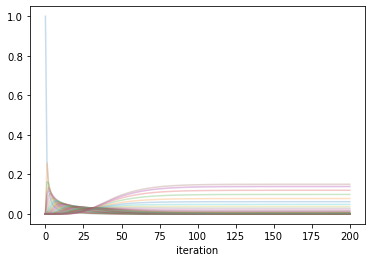

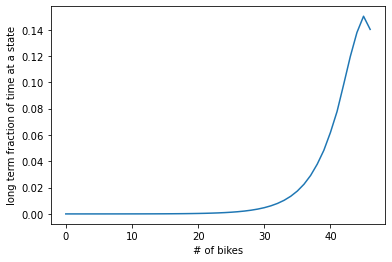

W21_p_night
[[0.06534596 0.07379245 0.08009256 0.07792906 0.07432253 0.06977092
  0.06397353 0.0573408  0.05174258 0.04613163 0.04098408 0.03615531
  0.03186986 0.02806563 0.02471289 0.02175433 0.01914775 0.01684813
  0.01482738 0.01304726 0.0114801  0.01010128 0.00888837 0.007821
  0.00688185 0.00605544 0.00532831 0.00468847 0.00412549 0.00363009
  0.00319424 0.00281072 0.00247266 0.00217596 0.00191513 0.00168384
  0.00148072 0.00130297 0.00114323 0.00100251 0.00087797 0.00076413
  0.00065472 0.00055533 0.00045825 0.00036813 0.00028445]]


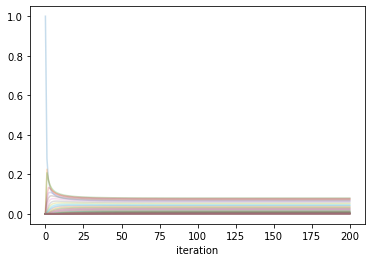

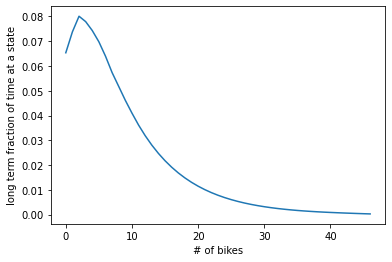

E17_p_morn
[[2.39212143e-11 4.10547618e-11 6.63275518e-11 1.03378545e-10
  1.59441131e-10 2.44952540e-10 3.75132068e-10 5.73410532e-10
  8.75837386e-10 1.33740652e-09 2.04230159e-09 3.11868979e-09
  4.76249601e-09 7.27276933e-09 1.11060310e-08 1.69596511e-08
  2.58985316e-08 3.95487895e-08 6.03937246e-08 9.22252344e-08
  1.40834390e-07 2.15063265e-07 3.28417063e-07 5.01513412e-07
  7.65848285e-07 1.16949428e-06 1.78590826e-06 2.72717823e-06
  4.16467047e-06 6.35958976e-06 9.71183129e-06 1.48300745e-05
  2.26473876e-05 3.45810556e-05 5.28105690e-05 8.06384815e-05
  1.23182809e-04 1.88054685e-04 2.87258074e-04 4.38519278e-04
  6.69733016e-04 1.02127267e-03 1.56048892e-03 2.37834058e-03
  3.63976520e-03 5.52363439e-03 8.41986342e-03 1.27788822e-02
  1.93387192e-02 2.81460238e-02 4.25231936e-02 6.11342482e-02
  9.11504786e-02 1.23555765e-01 1.65401706e-01 2.11804964e-01
  2.19682261e-01]]


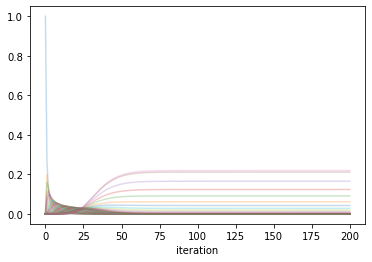

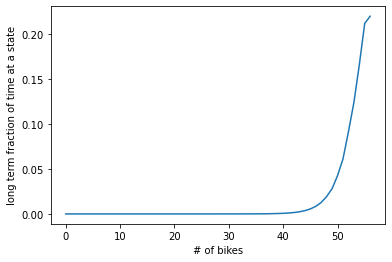

E17_p_night
[[8.87012241e-02 9.75936289e-02 9.91046780e-02 9.34853198e-02
  8.51904078e-02 7.61170611e-02 6.67003670e-02 5.81504718e-02
  5.00338924e-02 4.31247243e-02 3.66658209e-02 3.11476435e-02
  2.64389714e-02 2.24315942e-02 1.90308747e-02 1.61406719e-02
  1.36904856e-02 1.16101862e-02 9.84609310e-03 8.34907455e-03
  7.07964604e-03 6.00337785e-03 5.09067791e-03 4.31676700e-03
  3.66054918e-03 3.10408056e-03 2.63219465e-03 2.23204342e-03
  1.89272124e-03 1.60498349e-03 1.36098842e-03 1.15408581e-03
  9.78636792e-04 8.29859793e-04 7.03700448e-04 5.96720023e-04
  5.06002930e-04 4.29076973e-04 3.63845393e-04 3.08531048e-04
  2.61625389e-04 2.21853109e-04 1.88130208e-04 1.59508253e-04
  1.35245131e-04 1.14701513e-04 9.72378301e-05 8.24380322e-05
  6.98544418e-05 5.90895751e-05 4.98658967e-05 4.17654216e-05
  3.48108391e-05 2.84835522e-05 2.28062282e-05 1.78002820e-05
  1.31042678e-05]]


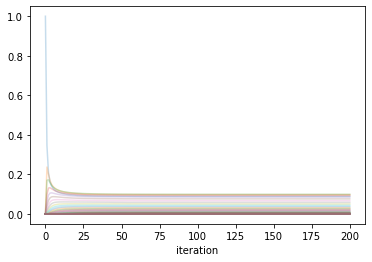

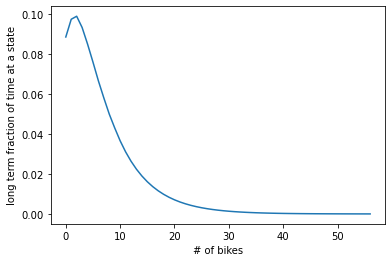

WCham_p_morn
[[0.00112643 0.00162482 0.00211935 0.00258305 0.00307696 0.00363391
  0.00425401 0.00498486 0.00583644 0.00683491 0.00800163 0.0093679
  0.01096839 0.01284366 0.01504186 0.01761947 0.02064255 0.02418653
  0.02834074 0.03321399 0.03894103 0.04568523 0.05359401 0.06248757
  0.07215448 0.08285912 0.09514664 0.1075931  0.1159755  0.10926187]]


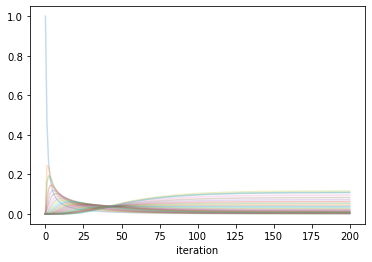

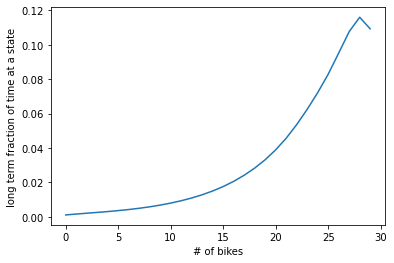

WCham_p_night
[[0.03808275 0.04496055 0.04885329 0.05179167 0.05259021 0.05199701
  0.05041806 0.04877913 0.04670956 0.0449163  0.04269349 0.04057852
  0.03846097 0.03644806 0.0346536  0.03284007 0.03113132 0.0294792
  0.02785986 0.02638792 0.02498009 0.02353292 0.02225535 0.02072896
  0.01893017 0.0174787  0.01600801 0.01425897 0.01232509 0.00987021]]


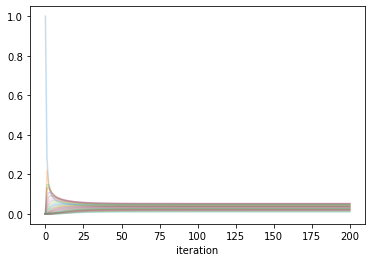

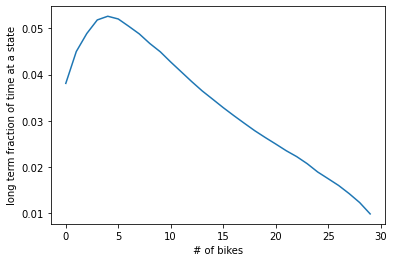

In [73]:
print("W21_p_morn")
find_stationary(W21_p_morn)
print("W21_p_night")
find_stationary(W21_p_night)

print("E17_p_morn")
find_stationary(E17_p_morn)
print("E17_p_night")
find_stationary(E17_p_night)

print("WCham_p_morn")
find_stationary(WCham_p_morn)
print("WCham_p_night")
find_stationary(WCham_p_night)

